In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Count the total number of “Confirmed”, “Recovered” and “Deceased” from 14-Mar-2020 to 05-Sept-2020 and report the numbers.

In [34]:
def Q1_1(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (states['date'] >= start_date) & (states['date'] <= end_date)
    states1=states.loc[mask]
    
    states1['total']= states1.groupby('status')['tt'].cumsum()
    states1.groupby('status')
    #states1.tail(20)
    
    values_con=(states1['total'].tail(3))[:-2]
    values_rec=(states1['total'].tail(2))[:-1]
    values_dec=(states1['total'].tail(1))
    
    confirmed_count=int(values_con.to_string(index=False))
    recovered_count=int(values_rec.to_string(index=False))
    deceased_count=int(values_dec.to_string(index=False))
    
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count

In [35]:
Q1_1('states.json','2020-09-05','2020-03-04')

confirmed_count:  4110211 recovered_count:  3177666 deceased_count:  70094


<ipython-input-34-f581780b2b08>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states1['total']= states1.groupby('status')['tt'].cumsum()


(4110211, 3177666, 70094)

## Count the total number of “Confirmed”, “Recovered” and “Deceased” from 14-Mar-2020 to 05-Sept-2020 for state Delhi 

In [36]:
def Q1_2(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    delhi=states[['dl','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (delhi['date'] >= start_date) & (delhi['date'] <= end_date)
    delhi=delhi.loc[mask]
    delhi['total']=delhi.groupby('status')['dl'].cumsum()
    
    values_con=(delhi['total'].tail(3))[:-2]
    values_rec=(delhi['total'].tail(2))[:-1]
    values_dec=(delhi['total'].tail(1))
    
    confirmed_count=int(values_con.to_string(index=False))
    recovered_count=int(values_rec.to_string(index=False))
    deceased_count=int(values_dec.to_string(index=False))
    
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count


In [37]:
Q1_2('states.json','2020-09-05','2020-03-04')

confirmed_count:  188193 recovered_count:  163785 deceased_count:  4538


(188193, 163785, 4538)

## Report total count of “Confirmed”, “Recovered” and “Deceased” count from states Delhi + Maharasthra (Sum of both states count) from 14-Mar-2020 to 05-Sept-2020.

In [38]:
def Q1_3(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    delhi=states[['dl','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (delhi['date'] >= start_date) & (delhi['date'] <= end_date)
    delhi=delhi.loc[mask]
    delhi['total']=delhi.groupby('status')['dl'].cumsum()
    
    values_con1=(delhi['total'].tail(3))[:-2]
    values_rec1=(delhi['total'].tail(2))[:-1]
    values_dec1=(delhi['total'].tail(1))
    
    confirmed_count1=int(values_con1.to_string(index=False))
    recovered_count1=int(values_rec1.to_string(index=False))
    deceased_count1=int(values_dec1.to_string(index=False))
    
    mah=states[['mh','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (mah['date'] >= start_date) & (mah['date'] <= end_date)
    mah=mah.loc[mask]
    mah['total']=mah.groupby('status')['mh'].cumsum()
    
    values_con2=(mah['total'].tail(3))[:-2]
    values_rec2=(mah['total'].tail(2))[:-1]
    values_dec2=(mah['total'].tail(1))
    
    confirmed_count2=int(values_con2.to_string(index=False))
    recovered_count2=int(values_rec2.to_string(index=False))
    deceased_count2=int(values_dec2.to_string(index=False))
    
    confirmed_count= confirmed_count1 +confirmed_count2
    recovered_count= recovered_count1 +recovered_count2
    deceased_count= deceased_count1 + deceased_count2
    
    print('confirmed_count: ',confirmed_count, 'recovered_count: ',recovered_count, 'deceased_count: ',deceased_count)
    return confirmed_count, recovered_count, deceased_count

In [39]:
Q1_3('states.json','2020-03-14','2020-09-05')

confirmed_count:  1072055 recovered_count:  800359 deceased_count:  30813


(1072055, 800359, 30813)

## Report the highest affected state in terms of “Confirmed”, “Recovered” and “Deceased” with the count till 05-Sept-2020 from 14-Mar-2020**

In [40]:
def Q1_4(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    
    datac=states[states['status']=='Confirmed']
    mask= (datac['date'] >= start_date) & (datac['date'] <= end_date)
    datac=datac.loc[mask]
    
    datac.drop(['status','date','tt'], axis=1, inplace=True)
    count_c=datac.sum(axis=0)
    c=count_c.max()
    
    
    print('Confirmed ')
    print('Highest affected State is: ', count_c[count_c == c].index[0])
    print('Highest affected State count is: ', c)
    
    datar=states[states['status']=='Recovered']
    mask= (datar['date'] >= start_date) & (datar['date'] <= end_date)
    datar=datar.loc[mask]
    datar.drop(['status','date','tt'], axis=1, inplace=True)
    count_r=datar.sum(axis=0)
    c=count_r.max()
    count_r[count_r == c].index[0]
    
    print('\nRecovered')
    print('Highest affected State is: ',count_r[count_r == c].index[0])
    print('Highest affected State count is: ',c)
    
    datad=states[states['status']=='Deceased']
    mask= (datad['date'] >= start_date) & (datad['date'] <= end_date)
    datad=datad.loc[mask]
    datad.drop(['status','date','tt'], axis=1, inplace=True)
    count_d=datad.sum(axis=0)
    c=count_d.max()
    
    
    print('\nDeceased')
    print('Highest affected State is: ',count_d[count_d == c].index[0])
    print('Highest affected State count is: ', c)



In [41]:
Q1_4('states.json','2020-03-14','2020-09-05')

Confirmed 
Highest affected State is:  mh
Highest affected State count is:  883862

Recovered
Highest affected State is:  mh
Highest affected State count is:  636574

Deceased
Highest affected State is:  mh
Highest affected State count is:  26275


## Report the lowest affected state in terms of “Confirmed”, “Recovered” and “Deceased” with the count till 05-Sept-2020 from 14-Mar-2020.

In [42]:
def Q1_5(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    
    datac=states[states['status']=='Confirmed']
    mask= (datac['date'] >= start_date) & (datac['date'] <= end_date)
    datac=datac.loc[mask]
    
    datac.drop(['status','date','tt','un','dd','ld'], axis=1, inplace=True)
    count_c=datac.sum(axis=0)
    c=count_c.min()
    lc=(count_c[count_c == c].index[0])
    
    print('Confirmed ')
    print('Lowest affected State is: ', lc)
    print('Lowest affected State count is: ', c)
    
    datar=states[states['status']=='Recovered']
    mask= (datar['date'] >= start_date) & (datar['date'] <= end_date)
    datar=datar.loc[mask]
    datar.drop(['status','date','tt','un','dd','ld'], axis=1, inplace=True)
    count_r=datar.sum(axis=0)
    c=count_r.min()
    lr=(count_r[count_r == c].index[0])
    
    print('\nRecovered')
    print('Lowest affected State is: ',lr)
    print('Lowest affected State count is: ',c)
    
    datad=states[states['status']=='Deceased']
    mask= (datad['date'] >= start_date) & (datad['date'] <= end_date)
    datad=datad.loc[mask]
    datad.drop(['status','date','tt','un','dd','ld'], axis=1, inplace=True)
    count_d=datad.sum(axis=0)
    c=count_d.min()
    ld=(count_d[count_d == c].index[0])
    
    print('\nDeceased')
    print('Lowest affected State is: ',ld)
    print('Lowest affected State count is: ', c)



In [43]:
Q1_5('states.json','2020-03-14','2020-09-05')

Confirmed 
Lowest affected State is:  mz
Lowest affected State count is:  1062

Recovered
Lowest affected State is:  mz
Lowest affected State count is:  713

Deceased
Lowest affected State is:  mz
Lowest affected State count is:  0


## Find the day and count with the highest spike in a day in the number of cases for the state Delhi for “Confirmed”, “Recovered” and “Deceased” between dates 14-Mar-2020 and 05-Sept-2020.**

In [44]:
def Q1_6(json_file_path, start_date, end_date):
    """Q1 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    delhi=states[['dl','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (delhi['date'] >= start_date) & (delhi['date'] <= end_date)
    delhi=delhi.loc[mask]
    
    
    series=delhi.groupby('status')['dl'].max()
    valc=series[0]
    valr=series[2]
    vald=series[1]
    
    print('\nConfirmed ')
    print('Day: ',(delhi[delhi['dl']== valc]['date']).to_string(index=False))
    print('Count: ',valc)
    print('\nRecovered')
    print('Day: ',(delhi[delhi['dl']== valr]['date']).to_string(index=False))
    print('Count: ',valr)
    print('\nDeceased')
    print('Day: ',(delhi[delhi['dl']== vald]['date']).to_string(index=False))
    print('Count: ',vald)

In [45]:
Q1_6('states.json','2020-03-14','2020-09-05')


Confirmed 
Day:  2020-06-23
Count:  3947

Recovered
Day:  2020-06-20
Count:  7725

Deceased
Day:  2020-06-16
Count:  437


## Report active cases (Assume active = Confirmed - (Recovered + Deceased)) state wise for all states separately on date 05-Sept-2020 (This date only) starting from 14-March-2020.

In [46]:
def Q1_7(json_file_path, start_date, end_date):
    """Q1 function : You have to count all the active cases and print the live active cases as on date.
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    mask= (states['date'] >= start_date) & (states['date'] <= end_date)
    states=states.loc[mask]
    
    datac=states[states['status']=="Confirmed"]
    datac.drop(['status','tt','un'],axis=1, inplace=True)
    datac.set_index('date', inplace=True)
    
    datar=states[states['status']=="Recovered"]
    datar.set_index('date', inplace=True)
    datar.drop(['status','tt','un'],axis=1, inplace=True)
    
    datad=states[states['status']=="Deceased"]
    datad.set_index('date', inplace=True)
    datad.drop(['status','tt','un'],axis=1, inplace=True)
    
    datanw=datac.loc[:] - datad.loc[:] - datar.loc[:]
    
    print(datanw.sum(axis=0))
    
    print() # print any way you want


In [47]:
Q1_7('states.json','2020-03-14','2020-09-05')

an       343
ap    100880
ar      1525
as     28404
br     16735
ch      2143
ct     22320
dd         0
dl     19870
dn       301
ga      4945
gj     16266
hp      2023
hr     14912
jh     14980
jk      9547
ka    100224
kl     21867
la       834
ld         0
mh    221013
ml      1374
mn      1872
mp     15687
mz       349
nl       701
or     25856
pb     15870
py      5163
rj     14996
sk       561
tg     32405
tn     51580
tr      5905
up     59963
ut      7649
wb     23390
dtype: int64



## Plot the area trend line for total “Confirmed”, “Recovered” and “Deceased” cases for the state Delhi (dl) from 14-Mar-2020 to 05-Sept-2020.

In [48]:
def Q2_1(json_file_path, start_date, end_date):
    """Q2 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (states['date'] >= start_date) & (states['date'] <= end_date)
    states1=states.loc[mask]
    
    states1['total']= states1.groupby('status')['tt'].cumsum()
    states1.groupby('status')
    #states1.tail(20)
    
    states1.set_index('date', inplace=True)
    states1=states1[['total','status']]
    states1.groupby('status')['total'].plot(kind='area', stacked=False, figsize=(18, 8))
    plt.legend()
    plt.show()
    
    #plt.show()
    #plt.save()

<ipython-input-48-dc1c14b3c364>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states1['total']= states1.groupby('status')['tt'].cumsum()


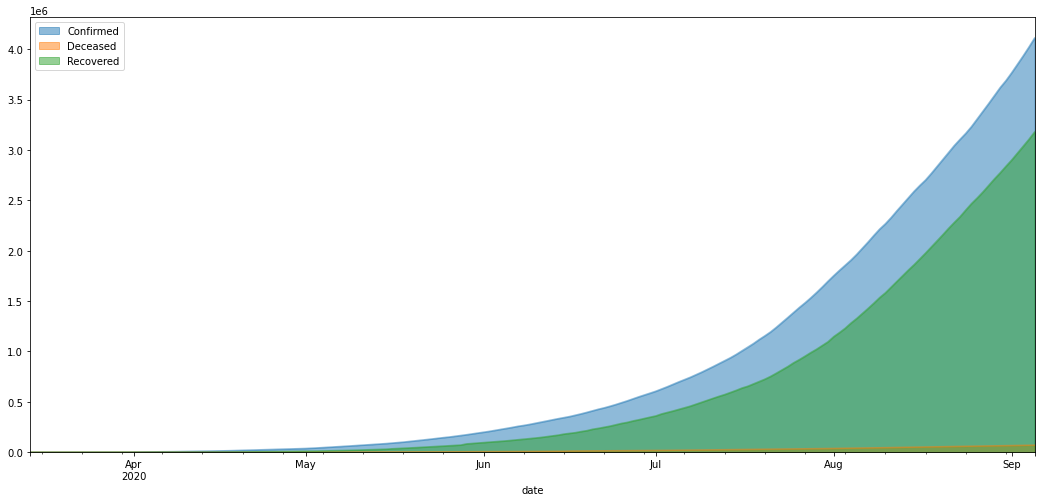

In [49]:
Q2_1('states.json','2020-03-14','2020-09-05')

## Plot the area trend line for total “Confirmed”, “Recovered” and “Deceased” cases for the state Delhi (dl) from 14-Mar-2020 to 05-Sept-2020.

In [50]:
def Q2_2(json_file_path, start_date, end_date):
    """Q2 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    delhi=states[['dl','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (delhi['date'] >= start_date) & (delhi['date'] <= end_date)
    delhi=delhi.loc[mask]
    delhi['total']=delhi.groupby('status')['dl'].cumsum()
    
    delhi.set_index('date', inplace=True)
    delhi.groupby('status')['total'].plot(kind='area', stacked=False, figsize=(18, 8))
    plt.legend()
    plt.show()
    
    #plt.show()
    #plt.save()
    

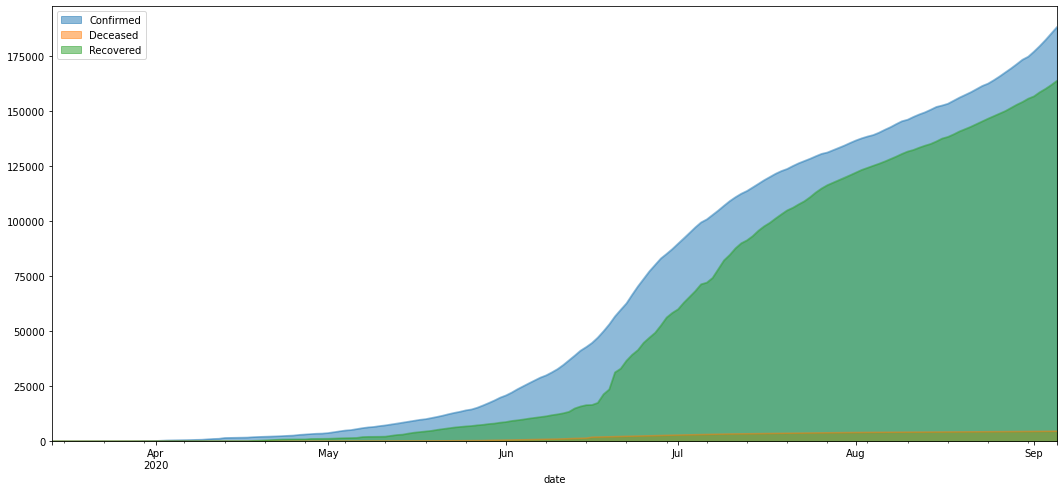

In [51]:
Q2_2('states.json','2020-03-14','2020-09-05')

## Plot the area trend line for active cases. Assume active = Confirmed - (Recovered + Deceased) from 14-Mar-2020 to 05-Sept-2020.

In [52]:
def Q2_3(json_file_path, start_date, end_date):
    """Q2 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    mask= (states['date'] >= start_date) & (states['date'] <= end_date)
    states=states.loc[mask]
    
    datac=states[states['status']=="Confirmed"]
    datac.drop(['status','tt'],axis=1, inplace=True)
    datac.set_index('date', inplace=True)
    
    datar=states[states['status']=="Recovered"]
    datar.set_index('date', inplace=True)
    datar.drop(['status','tt'],axis=1, inplace=True)
    
    datad=states[states['status']=="Deceased"]
    datad.set_index('date', inplace=True)
    datad.drop(['status','tt'],axis=1, inplace=True)
    
    datanw=datac.loc[:] - datad.loc[:] - datar.loc[:]
    datanw['total']=datanw.sum(axis=1)
    datanw['cumulative active cases']=datanw['total'].cumsum()
    datanw['cumulative active cases'].plot(kind='area', stacked=False, figsize=(18, 8))
    plt.legend()
    plt.show()
    
    #plt.show()
    #plt.save()

C:\Users\Gahina\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


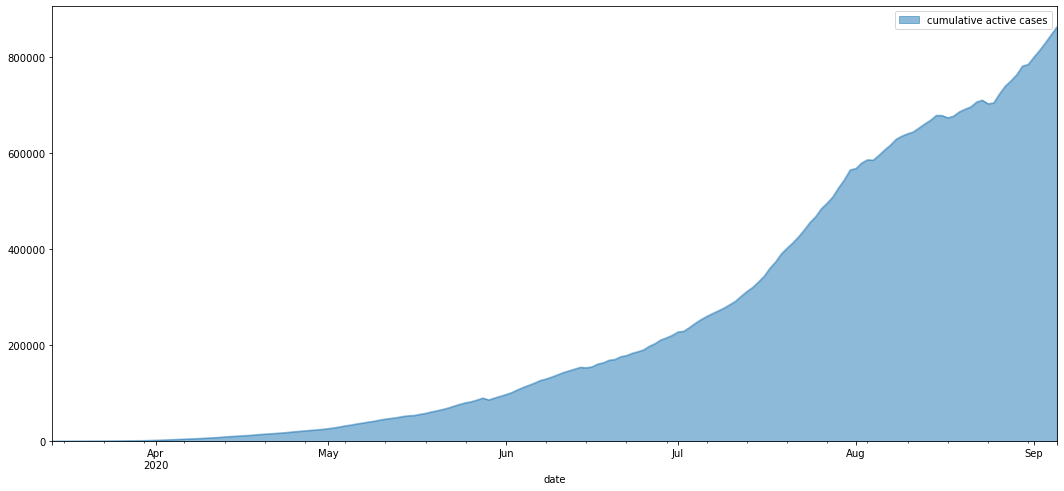

In [53]:
Q2_3('states.json','2020-03-14','2020-09-05')

# #Implement a linear regression on the state Delhi data over dates, separately for “Confirmed”, “Recovered” or “Deceased” and report intercept and slope coefficients for all 3 cases from 14-Mar-2020 to 05-Sept-2020.

In [63]:
def Q3(json_file_path, start_date, end_date):
    """Q3 function
    
    Args:
        json_file_path (TYPE): Description
        start_date (TYPE): Description
        end_date (TYPE): Description
    """
    
    if(start_date > end_date):
        temp=start_date
        start_date=end_date
        end_date=temp
    
    data=pd.read_json(json_file_path, orient='columns')
    states= pd.read_json((data['states_daily']).to_json(), orient='index')
    
    delhi=states[['dl','status','date']]
    #start_date='2020-03-14'
    #end_date='2020-09-05'
    mask= (delhi['date'] >= start_date) & (delhi['date'] <= end_date)
    delhi=delhi.loc[mask]
    
    delhic=delhi[['dl','status','date']]
    delhic=delhic[delhic['status']== 'Confirmed']
    y=delhic.iloc[:,0].values
    x=np.arange(1,y.shape[0]+1)
    print("Confirmed Slope and intercept")
    values1=Linear_Reg(x,y)
    
    confirmed_slope=values1[0]
    confirmed_intercept=values1[1]
    
    delhir=delhi[['dl','status','date']]
    delhir=delhir[delhir['status']== 'Recovered']
    y=delhir.iloc[:,0].values
    x=np.arange(1,y.shape[0]+1)
    print("Recovered Slope and Intercept")
    values2=Linear_Reg(x,y)
    
    recovered_slope=values2[0]
    recovered_intercept=values2[1]
    
    delhid=delhi[['dl','status','date']]
    delhid=delhid[delhid['status']== 'Deceased']
    y=delhid.iloc[:,0].values
    x=np.arange(1,y.shape[0]+1)
    print("Deceased Slope and Intercept")
    values3=Linear_Reg(x,y)
    
    deceased_slope=values3[0]
    deceased_intercept=values3[1]
    
    
    return confirmed_intercept, confirmed_slope, recovered_intercept, recovered_slope, deceased_intercept, deceased_slope


In [64]:
def Linear_Reg(x,y):
    xm=x.mean()
    ym=y.mean()
    xstd=np.std(x)
    ystd=np.std(y)
    
    x_f=np.zeros(x.shape[0])
    y_f=np.zeros(y.shape[0])
    xy_f= np.zeros(x.shape[0])
    x_sq=np.zeros(x.shape[0])
    y_sq=np.zeros(y.shape[0])
    
    for i in range(0, x.shape[0]):
        x_f[i]=x[i]-xm
        y_f[i]=y[i]-ym
        xy_f[i]=x_f[i]*y_f[i]
        
    num=xy_f.sum()
    x_sq=np.square(x_f)
    y_sq=np.square(y_f)
    den= math.sqrt(x_sq.sum() * y_sq.sum())
    r=num/den
    slope=r*ystd/xstd
    intercept= ym - (slope * xm)
    
    print(slope)
    print(intercept)
    
    return(slope, intercept)

In [65]:
Q3('states.json','2020-03-14','2020-09-05')

Confirmed Slope and intercept
12.2142692053709
-11.684415584415774
Recovered Slope and Intercept
12.305528285274049
-158.44266233766245
Deceased Slope and Intercept
0.19023332599603787
8.948441558441559


(-11.684415584415774,
 12.2142692053709,
 -158.44266233766245,
 12.305528285274049,
 8.948441558441559,
 0.19023332599603787)

MT20111
confirmed_count:  4110211 recovered_count:  3177666 deceased_count:  70094


<ipython-input-34-f581780b2b08>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states1['total']= states1.groupby('status')['tt'].cumsum()


confirmed_count:  188193 recovered_count:  163785 deceased_count:  4538
confirmed_count:  1072055 recovered_count:  800359 deceased_count:  30813
Confirmed 
Highest affected State is:  mh
Highest affected State count is:  883862

Recovered
Highest affected State is:  mh
Highest affected State count is:  636574

Deceased
Highest affected State is:  mh
Highest affected State count is:  26275
Confirmed 
Lowest affected State is:  mz
Lowest affected State count is:  1062

Recovered
Lowest affected State is:  mz
Lowest affected State count is:  713

Deceased
Lowest affected State is:  mz
Lowest affected State count is:  0

Confirmed 
Day:  2020-06-23
Count:  3947

Recovered
Day:  2020-06-20
Count:  7725

Deceased
Day:  2020-06-16
Count:  437
an       343
ap    100880
ar      1525
as     28404
br     16735
ch      2143
ct     22320
dd         0
dl     19870
dn       301
ga      4945
gj     16266
hp      2023
hr     14912
jh     14980
jk      9547
ka    100224
kl     21867
la       834
ld    

C:\Users\Gahina\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


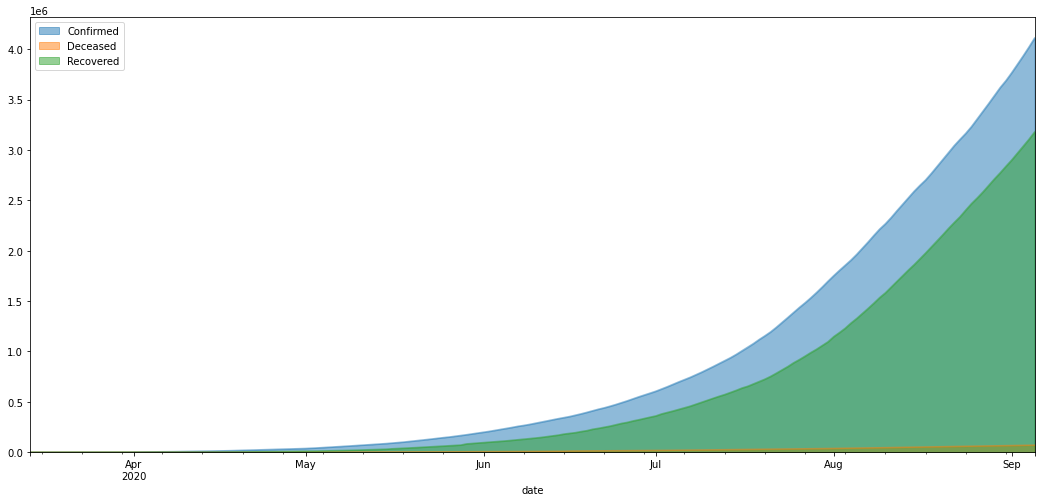

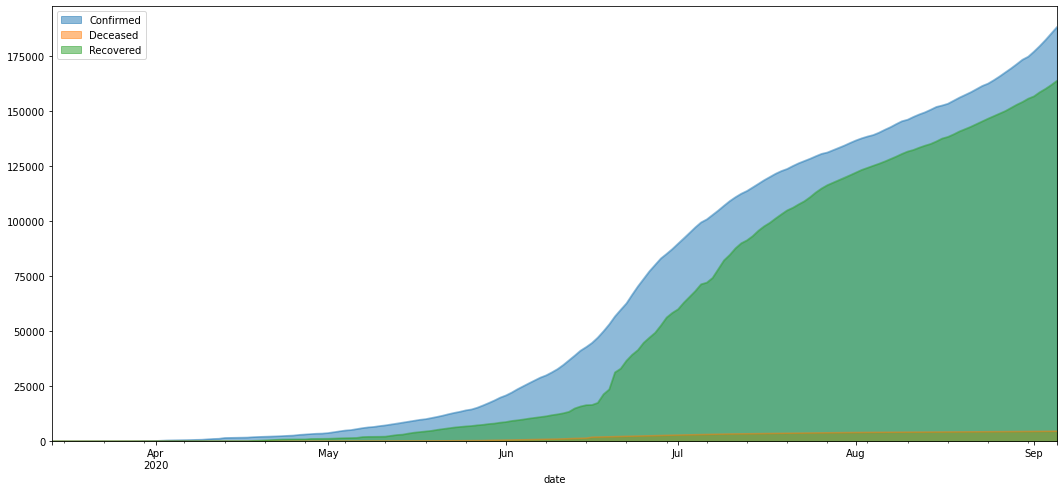

C:\Users\Gahina\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


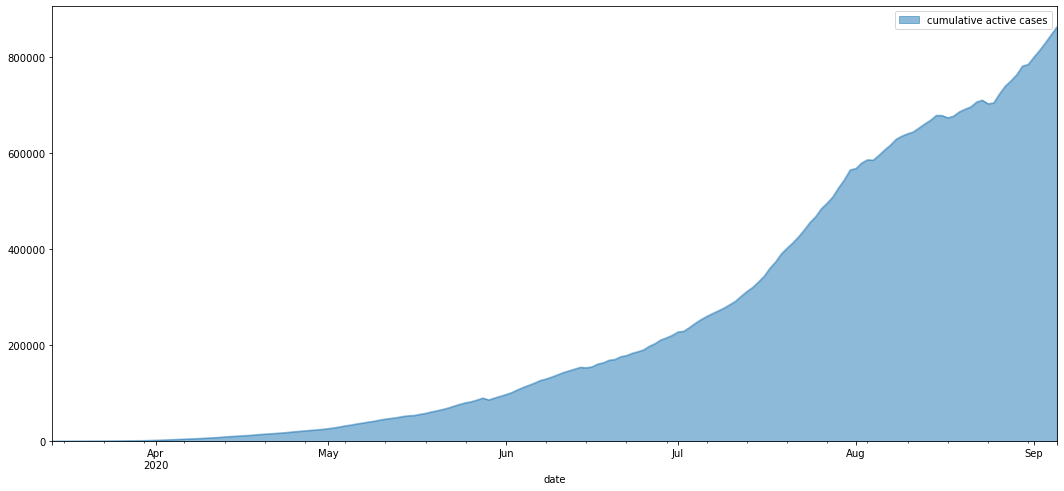

Confirmed Slope and intercept
12.2142692053709
-11.684415584415774
Recovered Slope and Intercept
12.305528285274049
-158.44266233766245
Deceased Slope and Intercept
0.19023332599603787
8.948441558441559


In [66]:
if __name__ == "__main__":
    # execute only if run as a script
    print('MT20111') # Please put this first

    start_date = "2020-03-14"
    end_date = "2020-09-05"
    
    Q1_1('states.json', start_date, end_date)
    
    Q1_2('states.json', start_date, end_date)
    Q1_3('states.json', start_date, end_date)
    Q1_4('states.json', start_date, end_date)
    Q1_5('states.json', start_date, end_date)
    Q1_6('states.json', start_date, end_date)
    Q1_7('states.json', start_date, end_date)
    Q2_1('states.json', start_date, end_date)
    Q2_2('states.json', start_date, end_date)
    Q2_3('states.json', start_date, end_date)
    Q3('states.json', start_date, end_date)
